In [1]:
!pip install opencv-python

In [2]:
import cv2

In [18]:
img1 = cv2.imread('/Users/kathleendewandre/code/dcorballorenzo/FF2S/raw_data/photo/photo1/image1317.jpg')

In [19]:
img1

array([[[ 71,  92,  83],
        [ 69,  90,  81],
        [ 65,  86,  77],
        ...,
        [159, 181, 146],
        [166, 186, 151],
        [166, 186, 151]],

       [[ 72,  93,  84],
        [ 69,  90,  81],
        [ 66,  87,  78],
        ...,
        [159, 181, 146],
        [161, 183, 148],
        [163, 183, 148]],

       [[ 72,  93,  84],
        [ 70,  91,  82],
        [ 66,  87,  78],
        ...,
        [154, 178, 143],
        [158, 180, 145],
        [158, 180, 145]],

       ...,

       [[132,  83, 235],
        [127,  78, 230],
        [119,  72, 224],
        ...,
        [ 63,  87,  99],
        [ 55,  81,  93],
        [ 58,  84,  96]],

       [[127,  80, 233],
        [126,  79, 231],
        [126,  79, 231],
        ...,
        [ 60,  84,  96],
        [ 59,  85,  97],
        [ 59,  85,  97]],

       [[127,  80, 233],
        [126,  79, 232],
        [126,  79, 231],
        ...,
        [ 58,  82,  94],
        [ 50,  76,  88],
        [ 50,  76,  88]]

In [18]:
from PIL import Image

In [21]:
from google.cloud import storage

storage_client = storage.Client("ff2s-370015")
bucket = storage_client.bucket("ff2s")


In [22]:
blob = bucket.blob('preproc_data/photo1_preproc/image0001.jpg')

In [25]:
import tensorflow as tf

2022-11-29 16:59:26.941247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#!gsutil cp -r gs://ff2s/preproc_data/photo1_preproc/ raw_data/processed_img

In [37]:
ds_paths = tf.data.Dataset.list_files("gs://ff2s/preproc_data/photo*/*.jpg")

In [38]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

In [41]:
ds_img = ds_paths.map(load_image)#.batch(16)

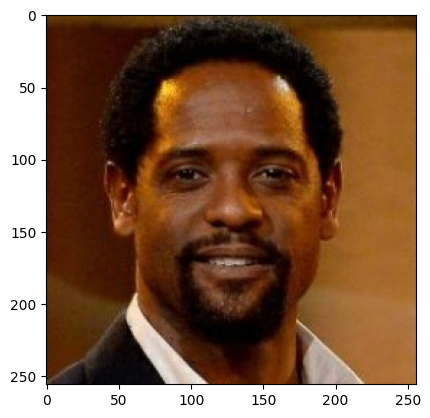

In [44]:
plt.imshow(next(iter(ds_img.take(1))).numpy())